# Data

This notebook is an initial exploration of ASPECT data, including initial attempts to load data into *yt*. 

ASPECT output from: 
Data source: [DOI 10.17605/OSF.IO/TEJM4](https://osf.io/tejm4/)
Title: Edge-Driven Convection and Mantle Wind Models Beneath Madagascar
Authors: Tahiry Rajaonarison, Sarah Stamps, Stewart Fishwick, Sascha Brune, Anne Glerum, Jiashun Hu 

To run notebook: download and unpack, set environment variable "ASPECTdatadir" to the directory containing the unzipped directory



# Data Format


Standard ASPECT output is in the form of `.pvtu` and `.vtu` files. For a single time step on multiple processors, the files look like:

```
solution-00022.0000.vtu
solution-00022.0001.vtu
solution-00022.0002.vtu
solution-00022.0003.vtu
solution-00022.0004.vtu
solution-00022.0005.vtu
solution-00022.0006.vtu
solution-00022.0007.vtu
solution-00022.0008.vtu
solution-00022.0009.vtu
solution-00022.0010.vtu
solution-00022.0011.vtu
solution-00022.0012.vtu
solution-00022.0013.vtu
solution-00022.0014.vtu
solution-00022.0015.vtu
solution-00022.pvtu
```

The `.vtu` files are the output from each processor, which handles a different part of the unstructured mesh. The `.pvtu` file is a plain text xml file, e.g.: 

```
<?xml version="1.0"?>
<!--
#This file was generated by the deal.II library on 2018/9/13 at 18:17:01
-->
<VTKFile type="PUnstructuredGrid" version="0.1" byte_order="LittleEndian">
  <PUnstructuredGrid GhostLevel="0">
    <PPointData Scalars="scalars">
    <PDataArray type="Float64" Name="velocity" NumberOfComponents="3" format="ascii"/>
    <PDataArray type="Float64" Name="p" format="ascii"/>
    <PDataArray type="Float64" Name="T" format="ascii"/>
    <PDataArray type="Float64" Name="crust" format="ascii"/>
    <PDataArray type="Float64" Name="mantle_lithosphere" format="ascii"/>
    <PDataArray type="Float64" Name="viscosity" format="ascii"/>
    <PDataArray type="Float64" Name="density" format="ascii"/>
    <PDataArray type="Float64" Name="strain_rate" format="ascii"/>
    <PDataArray type="Float64" Name="velocity_inclination" format="ascii"/>
    </PPointData>
    <PPoints>
      <PDataArray type="Float64" NumberOfComponents="3"/>
    </PPoints>
    <Piece Source="solution-00022.0000.vtu"/>
    <Piece Source="solution-00022.0001.vtu"/>
    <Piece Source="solution-00022.0002.vtu"/>
    <Piece Source="solution-00022.0003.vtu"/>
    <Piece Source="solution-00022.0004.vtu"/>
    <Piece Source="solution-00022.0005.vtu"/>
    <Piece Source="solution-00022.0006.vtu"/>
    <Piece Source="solution-00022.0007.vtu"/>
    <Piece Source="solution-00022.0008.vtu"/>
    <Piece Source="solution-00022.0009.vtu"/>
    <Piece Source="solution-00022.0010.vtu"/>
    <Piece Source="solution-00022.0011.vtu"/>
    <Piece Source="solution-00022.0012.vtu"/>
    <Piece Source="solution-00022.0013.vtu"/>
    <Piece Source="solution-00022.0014.vtu"/>
    <Piece Source="solution-00022.0015.vtu"/>
  </PUnstructuredGrid>
</VTKFile>
```

The `PDataArray` entries describe the avaiable fields, the `Piece Source` entries point to the individual processor files that comprise the full mesh.

# Reference Plots with *visit*
*visit* (https://wci.llnl.gov/simulation/computer-codes/visit) is commonly used by ASPECT users, so here are some screen shots of loading the above data to get an initial sense of what is there.


## a single `.vtu` file 

For example, here's a visualization of the mesh from a single `.vtu` file loaded using *visit*

![partialMesh](resources/visitScreenshot_vtu.png)


## loading the full `.pvtu` file 

In *visit*, when you load the `.pvtu` file it collects the pieces from all the processors : 

![fullMesh](resources/visitScreenshot_fullMesh.png)


## rendering a field variable from the full `.pvtu` file 

And here is an example of visualizing the temperature field: 

![visitTemp](resources/visitScreenshot_T.png)

# Exploring ASPECT output with *meshio* and *xmltodict*

In [1]:
import os, yt, numpy as np
import xmltodict, meshio 

%matplotlib notebook
import matplotlib.pyplot as plt 

In [2]:
DataDir=os.path.join(os.environ.get('ASPECTdatadir','../'),'edc_driven_convection_madagascar',
                     'edc_driven_convection_madagascar','solution')

In [3]:
pFile=os.path.join(DataDir,'solution-00005.pvtu')
if os.path.isfile(pFile) is False:
    print("data file not found")
    
# parse the multiprocessory summary file
with open(pFile) as data:
    pXML = xmltodict.parse(data.read())
    
# pull out a single processor .vtu file 
sFile=pXML['VTKFile']['PUnstructuredGrid']['Piece'][0]['@Source']
sFile=os.path.join(DataDir,sFile)

# *meshio*: loading a single .vtu file


In [4]:
sP=meshio.read(sFile)

In [5]:
dir(sP)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cell_data',
 'cell_data_dict',
 'cell_sets',
 'cell_sets_dict',
 'cells',
 'cells_dict',
 'field_data',
 'get_cell_data',
 'get_cells_type',
 'gmsh_periodic',
 'info',
 'int_data_to_sets',
 'point_data',
 'point_sets',
 'points',
 'prune',
 'read',
 'sets_to_int_data',
 'write']

**connectivity info is in cells:**

In [6]:
len(sP.cells)

8

In [7]:
# cells are further subdivided 
sP.cells[0]

CellBlock(type='hexahedron', data=array([[    0,     1,     3, ...,     5,     7,     6],
       [    8,     9,    11, ...,    13,    15,    14],
       [   16,    17,    19, ...,    21,    23,    22],
       ...,
       [17448, 17449, 17451, ..., 17453, 17455, 17454],
       [17456, 17457, 17459, ..., 17461, 17463, 17462],
       [17464, 17465, 17467, ..., 17469, 17471, 17470]], dtype=int32))

In [8]:
sP.cells[0].data

array([[    0,     1,     3, ...,     5,     7,     6],
       [    8,     9,    11, ...,    13,    15,    14],
       [   16,    17,    19, ...,    21,    23,    22],
       ...,
       [17448, 17449, 17451, ..., 17453, 17455, 17454],
       [17456, 17457, 17459, ..., 17461, 17463, 17462],
       [17464, 17465, 17467, ..., 17469, 17471, 17470]], dtype=int32)

In [9]:
sP.cells[0].data.shape

(2184, 8)

In [10]:
# a single hexahedron voxel connectivity
sP.cells[0].data[0]

array([0, 1, 3, 2, 4, 5, 7, 6], dtype=int32)

In [11]:
# coordinate info in points
sP.points

array([[ 4251470.30616899,  2976911.55685427, -2759618.16365957],
       [ 4256644.64687846,  2980534.6692243 , -2762976.81456819],
       [ 4235170.61707754,  3000055.33712502, -2759618.16365957],
       ...,
       [ 4034124.13830093,  4450970.08761739, -1317999.8246718 ],
       [ 4005123.50922364,  4467703.30644549, -1316466.6335507 ],
       [ 4009787.97974399,  4472906.50937258, -1317999.8246718 ]])

In [12]:
sP.points.shape

(139840, 3)

In [13]:
# actual field data is in point_data
sP.point_data

{'velocity': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.36602708e-05, -4.45754013e-05,  4.13217131e-05],
        [-2.49424018e-04,  3.52111267e-04,  0.00000000e+00],
        ...,
        [ 1.28487940e-03,  4.28326806e-04, -1.42322489e-04],
        [ 1.25289906e-03,  6.92421920e-04, -1.30072774e-04],
        [ 1.24936993e-03,  5.90830517e-04, -1.02484053e-04]]),
 'p': array([1.40637481e+10, 1.38452081e+10, 1.40637164e+10, ...,
        5.68988006e+09, 5.91218483e+09, 5.68990310e+09]),
 'T': array([1840.6965332 , 1837.11938477, 1842.52648926, ..., 1727.26367188,
        1731.66894531, 1728.08190918]),
 'crust': array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -9.98153837e-21, -2.04027511e-21, -1.05621820e-20]),
 'mantle_lithosphere': array([-2.03886474e-38, -6.02088624e-38,  9.18995635e-39, ...,
         7.86181762e-14,  2.24783113e-14,  1.12801885e-13]),
 'viscosity': array([6.35352495e+20, 6.19644573e+20, 6.70766269e+20, ...,
        1.

In [14]:
# data at nodes is in coordinate order
sP.point_data['T'].shape

(139840,)

In [15]:
# pull some values for a node set
print(sP.point_data.keys())
sampleNodes=sP.cells[0].data[0]

print(sampleNodes)

print("sample T:")
print(sP.point_data['T'][sampleNodes])

print("\nsample xyz:")
print(sP.points[sampleNodes])

dict_keys(['velocity', 'p', 'T', 'crust', 'mantle_lithosphere', 'viscosity', 'density', 'strain_rate', 'velocity_inclination'])
[0 1 3 2 4 5 7 6]
sample T:
[1840.6965332  1837.11938477 1838.94946289 1842.52648926 1841.03149414
 1837.45446777 1839.43432617 1842.80651855]

sample xyz:
[[ 4251470.30616899  2976911.55685427 -2759618.16365957]
 [ 4256644.64687846  2980534.6692243  -2762976.81456819]
 [ 4240325.11991004  3003706.61711608 -2762976.81456819]
 [ 4235170.61707754  3000055.33712502 -2759618.16365957]
 [ 4263736.37976591  2985500.35405107 -2731269.72497969]
 [ 4268925.64915637  2989133.91959607 -2734593.87382908]
 [ 4252559.03811952  3012372.72172832 -2734593.87382908]
 [ 4247389.663841    3008710.90729485 -2731269.72497969]]


<IPython.core.display.Javascript object>


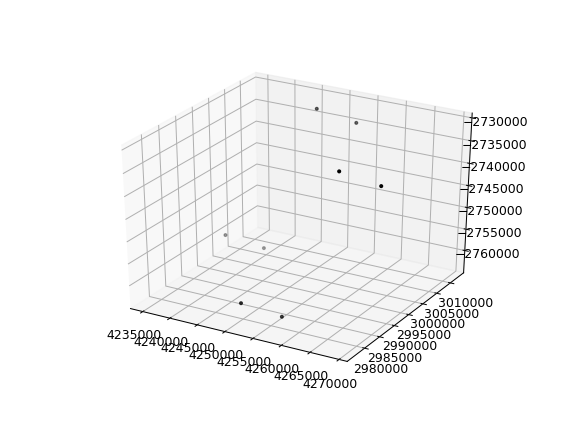

<IPython.core.display.Javascript object>


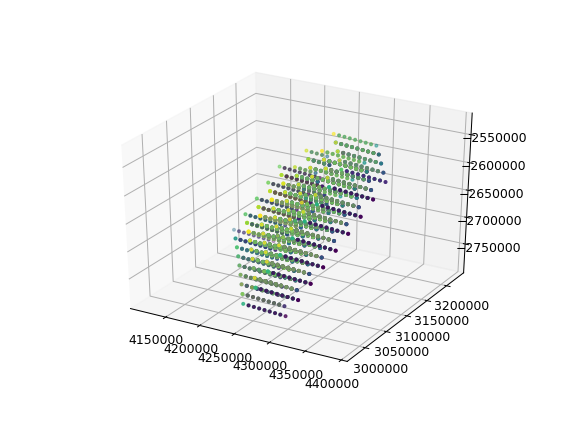

In [16]:
# some manual plotting of the mesh 

sampleNodes=sP.cells[0].data[0]

crds=sP.points[sampleNodes]
X=crds[:,0]
Y=crds[:,1]
Z=crds[:,2]

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z,color='k',marker='.')
plt.show()


sampleNodes=sP.cells[0].data[0:400]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for nds in sampleNodes:
    crds=sP.points[nds]
    X=crds[:,0]
    Y=crds[:,1]
    Z=crds[:,2]
    Tvals=sP.point_data['T'][nds]
    ax.scatter(X,Y,Z,marker='.',c=Tvals)
    
plt.show()    

## loading a single cell block into *yt*

In [17]:
# let's load a single cell block and field into yt
connectivity=sP.cells[0].data
coords=sP.points[0:connectivity.max()+1] # points contains ALL vertex coords across blocks
node_data={('connect1','T') : sP.point_data['T'][connectivity].astype("f8")}


print(connectivity.shape)
print(coords.shape)
print(node_data[('connect1','T')].shape)


ds = yt.load_unstructured_mesh(
    connectivity.astype("i8"),
    coords.astype("f8"),
    node_data = node_data 
)

yt : [INFO     ] 2020-06-23 09:33:35,516 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-23 09:33:35,517 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-06-23 09:33:35,517 Parameters: domain_left_edge          = [ 3578253.51624149  2679220.40116884 -3094692.23601728]
yt : [INFO     ] 2020-06-23 09:33:35,518 Parameters: domain_right_edge         = [ 4876256.0411066   3824405.37329946 -2172835.51573034]
yt : [INFO     ] 2020-06-23 09:33:35,519 Parameters: cosmological_simulation   = 0.0


(2184, 8)
(17472, 3)
(2184, 8)


from `load_unstructured_mesh` docstring: 
* connectivity (list of array_like or array_like) – This should either be a single 2D array or list of 2D arrays. If this is a list, each element in the list corresponds to the connectivity information for a distinct mesh. Each array can have different connectivity length and should be of shape (N,M) where N is the number of elements and M is the number of vertices per element.
* coordinates (array_like) – The 3D coordinates of mesh vertices. This should be of size (L, D) where L is the number of vertices and D is the number of coordinates per vertex (the spatial dimensions of the dataset). Currently this must be either 2 or 3. When loading more than one mesh, the data for each mesh should be concatenated into a single coordinates array.
* node_data (dict or list of dicts) – For a single mesh, a dict mapping field names to 2D numpy arrays, representing data defined at element vertices. For multiple meshes, this must be a list of dicts. Note that these are not the values as a function of the coordinates, but of the connectivity. Their shape should be the same as the connectivity. This means that if the data is in the shape of the coordinates, you may need to reshape them using the connectivity array as an index.


yt : [INFO     ] 2020-06-23 09:33:35,602 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 09:33:35,602 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 09:33:35,603 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 09:33:35,603 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 09:33:35,604 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



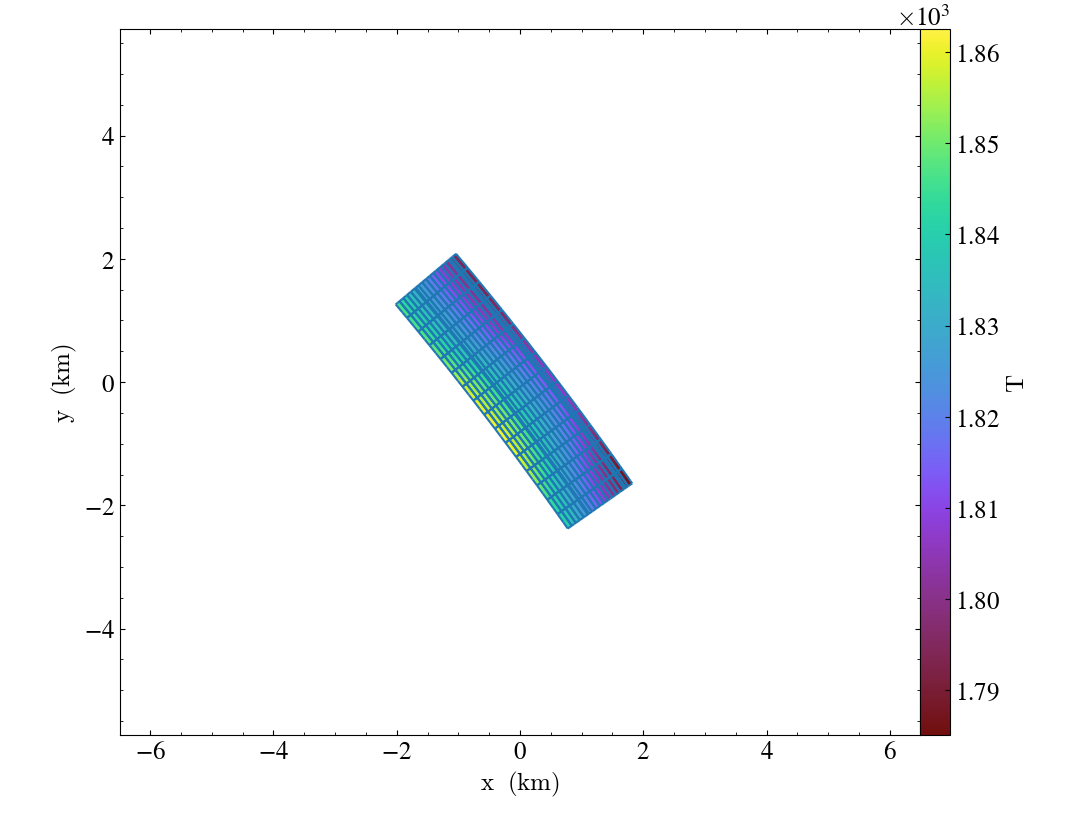

yt : [INFO     ] 2020-06-23 09:33:36,108 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 09:33:36,109 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 09:33:36,110 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 09:33:36,110 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 09:33:36,111 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



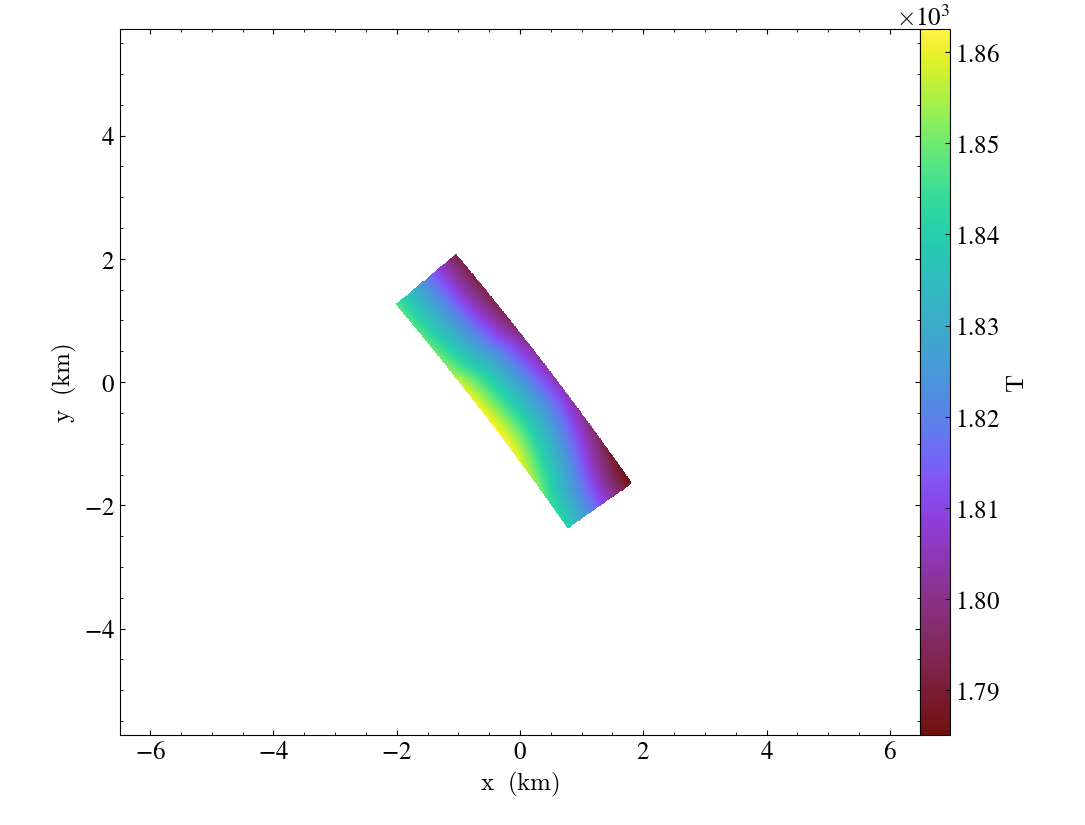

In [18]:
slc=yt.SlicePlot(ds, "z", ("connect1", "T")).annotate_mesh_lines()
slc.set_log("T",False)
slc.show()

slc=yt.SlicePlot(ds, "z", ("connect1", "T"))
slc.set_log("T",False)
slc.show()

that looks potentially correct (tho those distance units are weird).... now: 
## load full single vtu file (still one processor's data)

In [19]:
try:
    nCells=len(sP.cells)
except: 
    sP=meshio.read(sFile)
    nCells=len(sP.cells)

# let's load a single cell block and field into yt
print("there are {nCells} CellBlocks in this vtu".format(nCells=nCells))

there are 8 CellBlocks in this vtu


In [20]:
# cell block cell data does not contain duplicates
a,c=np.unique(sP.cells[0].data,return_counts=True)
print(len(c[c>1]))

# because the point data is repeated 
a,c=np.unique(sP.points,return_counts=True)
print(len(c[c>1]))


0
51417


In [21]:
# coords and node_data are already global, ordered, minor adjustments:
coords=sP.points.astype("f8")


# flatten the cell blocks into single connectivity
connectivity=[]
for cBi,cB in enumerate(sP.cells):     
    block_con=cB.data
    connectivity.extend(block_con.tolist())
connectivity=np.array(connectivity)


# node_data = {("connect1", fld) : np.reshape(vals,connectivity.shape).astype("f8") for fld, vals in sP.point_data.items()}

node_data = {("connect1", "T") : np.reshape(sP.point_data['T'],connectivity.shape).astype("f8")} # breaks for vectors with components

print("connectivity shape and size")
print(connectivity.shape)
print(connectivity.size)

print("coordinates shape")
print(coords.shape)

print("node data shape")
print(node_data[("connect1", 'T')].shape)


ds = yt.load_unstructured_mesh(
    connectivity.astype("i8"),
    coords,
    node_data = node_data 
)    


yt : [INFO     ] 2020-06-23 09:33:36,538 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-23 09:33:36,538 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-06-23 09:33:36,539 Parameters: domain_left_edge          = [ 2942087.77597532  2679220.40116884 -3242472.87599667]
yt : [INFO     ] 2020-06-23 09:33:36,539 Parameters: domain_right_edge         = [ 5160369.30842531  5562836.63343369 -1001632.35358264]
yt : [INFO     ] 2020-06-23 09:33:36,540 Parameters: cosmological_simulation   = 0.0


connectivity shape and size
(17480, 8)
139840
coordinates shape
(139840, 3)
node data shape
(17480, 8)


yt : [INFO     ] 2020-06-23 09:33:36,615 xlim = 2942087.775975 5160369.308425
yt : [INFO     ] 2020-06-23 09:33:36,615 ylim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 09:33:36,617 xlim = 2942087.775975 5160369.308425
yt : [INFO     ] 2020-06-23 09:33:36,618 ylim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 09:33:36,618 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800
/home/chavlin/miniconda3/envs/sandbox/lib/python3.6/site-packages/yt/visualization/plot_window.py:907: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) == np.nanmin(image):
/home/chavlin/miniconda3/envs/sandbox/lib/python3.6/site-packages/yt/visualization/plot_window.py:910: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) <= 0:
yt : [WARNING  ] 2020-06-23 09:33:36,631 Plot image for field ('connect1', 'T') is filled with NaNs.
yt : [WARNING  ] 2020-06-23 09:33:36,632 Switching to linear colorbar scaling.



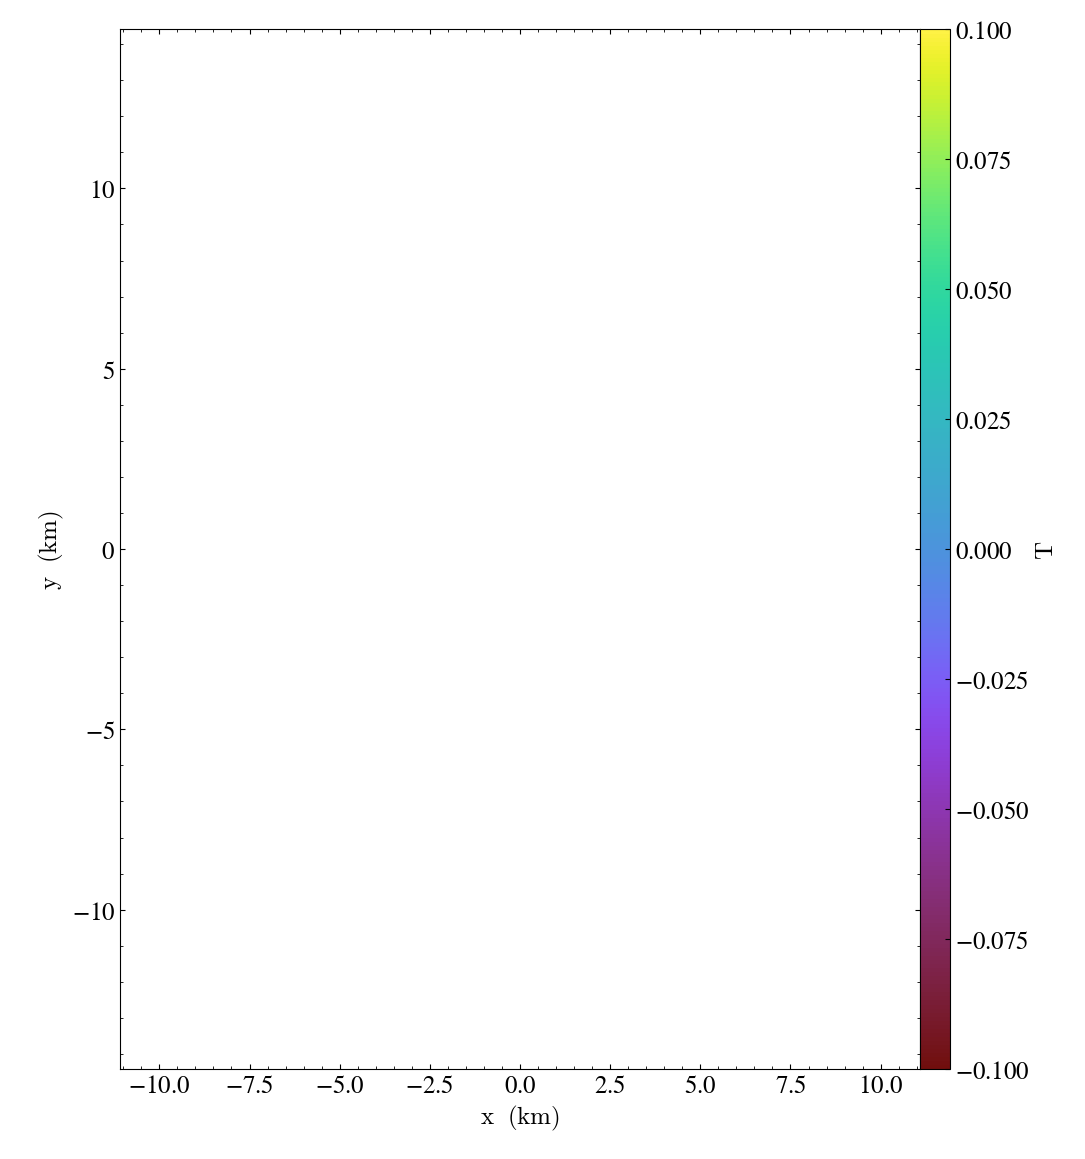

In [22]:
p=yt.SlicePlot(ds, "z", ("connect1", "T"))
p.set_log("T",False)
p.show()


yt : [INFO     ] 2020-06-23 09:33:37,038 xlim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 09:33:37,039 ylim = -3242472.875997 -1001632.353583
yt : [INFO     ] 2020-06-23 09:33:37,040 xlim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 09:33:37,040 ylim = -3242472.875997 -1001632.353583
yt : [INFO     ] 2020-06-23 09:33:37,041 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



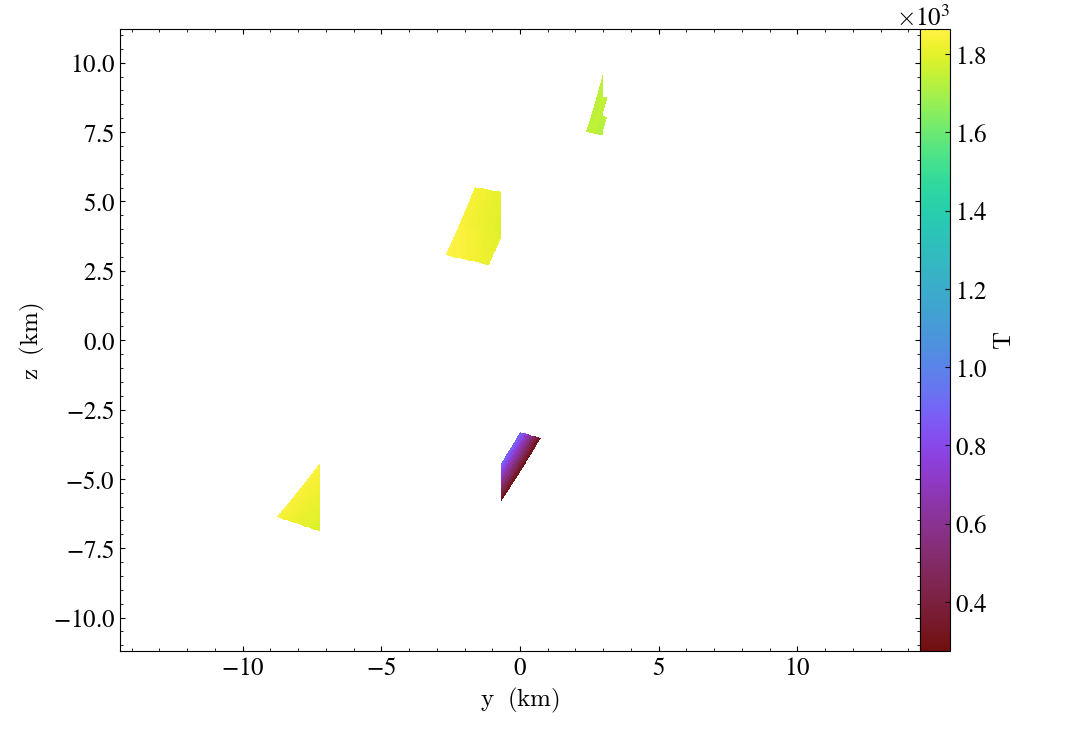

In [23]:
p=yt.SlicePlot(ds, "x", ("connect1", "T"))
p.set_log("T",False)
p.show()

**The above doesn't look good -- but** a single `.vtk` file is not guaranteed to have continuous sequences of the total mesh, so the slicing may be sampling regions with no data? Need to load all the data to confirm: 

## load all the vtu files

The main difference between the *meshio* output and what `yt.load_unstructured_mesh()` expects is that *meshio* loads the field data as a 1D array the same length as the coordinate array, while `yt.load_unstructured_mesh()` expects `node_data` to be element-ordered. So for each `.vtu` file, we need to reshape that data. 

In [24]:
def loadPiece(srcFi): 
    sP=meshio.read(srcFi)
    
    # coords and node_data are already global, ordered, minor adjustments:
    coords=sP.points.tolist()

    # flatten the cell blocks into single connectivity
    connectivity=[]
    for cBi,cB in enumerate(sP.cells):     
        block_con=cB.data
        connectivity.extend(block_con.tolist())
    connectivity=np.array(connectivity)

    FldData=np.reshape(sP.point_data['T'],connectivity.shape)
    node_data = {("connect1", "T") : FldData} # breaks for vectors with components
    
    return [connectivity.tolist(),coords,node_data]

coordlist=[]
conlist=[]
nodeDict={("connect1","T"):[]}
minz=[]
maxz=[]
for src in pXML['VTKFile']['PUnstructuredGrid']['Piece']:
    srcFi=os.path.join(DataDir,src['@Source'])
    print(srcFi)
    [con,coord,node_d]=loadPiece(srcFi)

    coordlist.extend(coord)
    minz.append(np.array(coord[2]).min())
    maxz.append(np.array(coord[2]).max())

    initshape=np.array(conlist).shape
    conlist.extend(con)
    nodeDict[("connect1","T")].extend(node_d[("connect1","T")].tolist())
    
#     print(np.array(coordlist).shape)
#     print(np.array(conlist).shape)
#     print(np.array(nodeDict[("connect1","T")]).shape)

nodeDict[("connect1","T")]=np.array(nodeDict[("connect1","T")])
conlist=np.array(conlist)
coordlist=np.array(coordlist)
  
    

/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0000.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0001.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0002.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0003.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0004.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0005.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0006.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_

(262144, 8)
2097152
(2097152, 3)
(262144, 8)
2097152


<IPython.core.display.Javascript object>


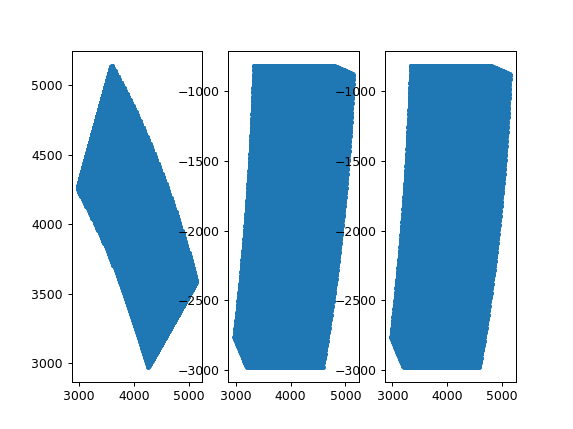

In [25]:
# just to confirm, let's check some shapes and make some matplotlib plots of the coordinates: 

print(conlist.shape)
print(conlist.size)
print(coordlist.shape)
print(nodeDict[("connect1","T")].shape)
print(nodeDict[("connect1","T")].size)

coordlist=coordlist/1000. # its in cm.... 
f=plt.figure()
plt.subplot(1,3,1)
plt.plot(coordlist[:,0],coordlist[:,1],'.')

plt.subplot(1,3,2)
plt.plot(coordlist[:,0],coordlist[:,2],'.')

plt.subplot(1,3,3)
plt.plot(coordlist[:,1],coordlist[:,2],'.')
plt.show()



Looks like the full mesh is being loaded and assembled correctly (again, not sure about units here). 

**so let's load it into** *yt*

In [26]:

ds = yt.load_unstructured_mesh(
    conlist.astype("i8"),
    coordlist.astype("f8"),
    node_data = nodeDict 
)  




yt : [INFO     ] 2020-06-23 09:33:42,027 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-23 09:33:42,028 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-06-23 09:33:42,028 Parameters: domain_left_edge          = [ 2679.22040117  2679.22040117 -3272.02900399]
yt : [INFO     ] 2020-06-23 09:33:42,029 Parameters: domain_right_edge         = [5653.60091489 5653.60091489 -736.27069874]
yt : [INFO     ] 2020-06-23 09:33:42,029 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2020-06-23 09:33:42,110 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 09:33:42,110 ylim = -3272.029004 -736.270699
yt : [INFO     ] 2020-06-23 09:33:42,111 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 09:33:42,112 ylim = -3272.029004 -736.270699
yt : [INFO     ] 2020-06-23 09:33:42,112 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



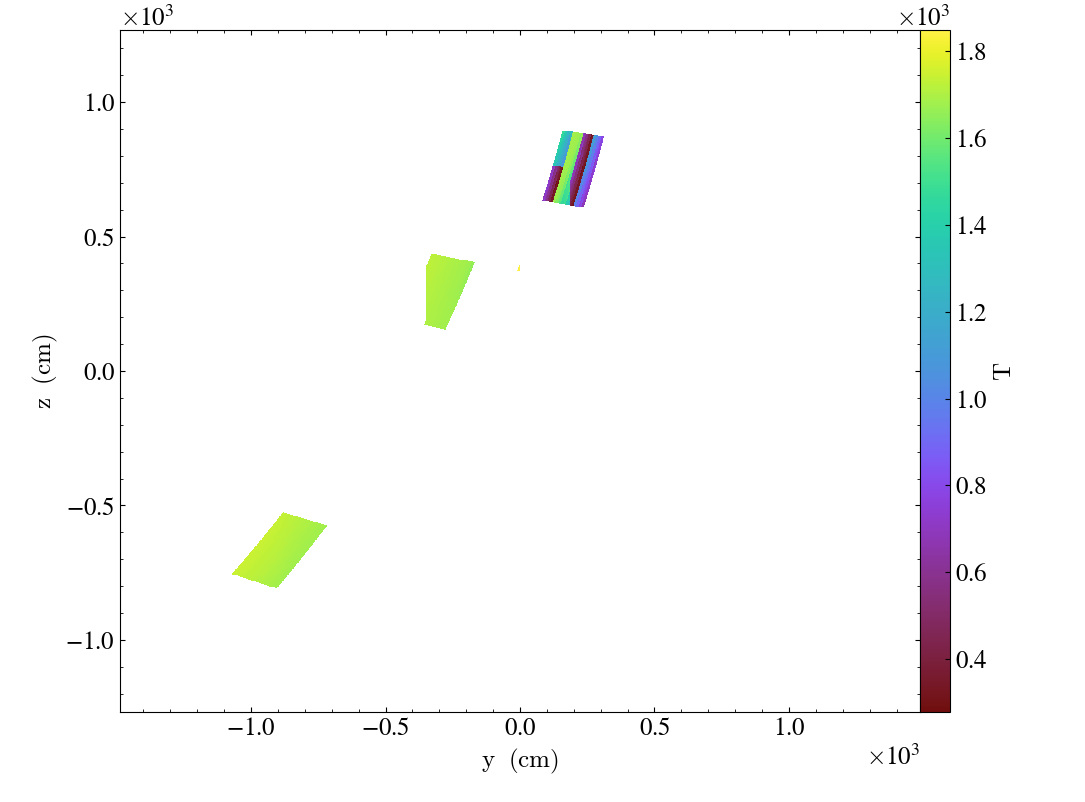

In [27]:
p=yt.SlicePlot(ds, "x", ("connect1", "T"))
p.set_log("T",False)
p.show()

hmm... that's not right.... 